In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import sosfilt, butter
from sklearn.cross_decomposition import CCA

In [5]:
sub = 1 

In [6]:
clean_eeg_df = pd.read_csv(f'../data/sub0{sub}_eeg_clean.csv')
noisy_eeg_df = pd.read_csv(f'../data/sub0{sub}_eeg_noisy.csv')
ssvep_eeg_df = pd.read_csv(f'../data/sub0{sub}_eeg_ssvep.csv')

# Okay we are making some BOLD ASSUMPTIONS RN:
 - ALL THAT ALL THE CHANNELS ARE VALID AND CORRESPOND TO VISUAL STIMULI
- That (ssvep_eeg_df.to_numpy[:, a]) indicates channel -> a
# and that's about it

Text(0, 0.5, 'mV')

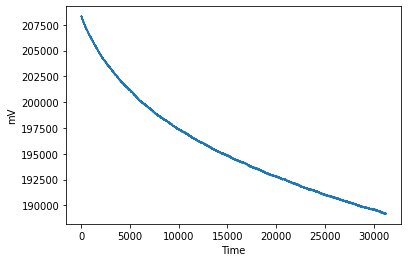

In [7]:
plt.plot(ssvep_eeg_df.to_numpy()[:,4])
plt.xlabel('Time')
plt.ylabel('mV')


In [17]:
np_arr_channels = ssvep_eeg_df.to_numpy()
print(np_arr_channels.shape)

# not 0 indexed <- 1 indexed
num_channels = np_arr_channels.shape[1] - 2

(31259, 10)


In [55]:
# collect all channels into a list

channel_signals = [np_arr_channels[:,x] for x in range(1, num_channels + 1)]

In [56]:
# figure out time duration between each sample
python_time_channel = np_arr_channels[:,0]
time_channel = [python_time_channel[x] - python_time_channel[x-1] for x in range(1, len(python_time_channel))]

# average time duration
avg_time = np.mean(time_channel)

# above is average seconds per sample
# number of avg time per second is
avg_time_per_second = 1/avg_time

In [57]:
# create duration of channels var
duration = np_arr_channels.shape[0]

In [89]:

# create time array
time_arr = np.arange(0, duration).astype(float)

# goofy AAAA code -> probably could do wit linspace
for i in range(time_arr.shape[0]):
    if (i == 0):
        time_arr[i] = 0
    else:
        time_arr[i] = time_arr[i-1] + avg_time


# create a 7hz signal
seven_hz_signal = np.sin(2 * np.pi * 7 * time_arr / avg_time_per_second)

# create a 21hz signal
twentyone_hz_signal = np.sin(2 * np.pi * 21 * time_arr / avg_time_per_second)

In [87]:


# Generate scores for the 7hz & 21hz signal

seven_hz_scores = []
twenty_one_hz_scores = []


for channel_num, hz_channel in enumerate([seven_hz_signal, twentyone_hz_signal]):
    for channel in channel_signals:
        cca = CCA(n_components=1)
        cca.fit(channel.reshape(-1, 1), hz_channel.reshape(-1, 1))
        
        if (channel_num == 0):
            seven_hz_scores.append(cca.score(channel.reshape(-1, 1), hz_channel.reshape(-1, 1)))
        else:
            twenty_one_hz_scores.append(cca.score(channel.reshape(-1, 1), hz_channel.reshape(-1, 1)))

# TODO: figure out what n_components does
    

In [88]:
print(seven_hz_scores)
print(twenty_one_hz_scores)

[1.0, -0.9665116194874761, -0.860989310217577, -0.8567554288744075, -0.8639246413160548, -0.7781675343795724, -0.9389660833094327, -0.9022546497215278]
[-0.9888680453620415, -0.9543523031570578, -0.9461307979268938, -0.9450941542194979, -0.9728376635335176, -0.8647310003713673, -0.9793992243620313, -0.9342898299659261]
